In [1]:
import IPython
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import PIL

%matplotlib inline

In [2]:
# Functions that are used

def gaussian(sigma,mu,t):
    return np.exp(-((t-mu)/float(2*sigma))**2)/float(sigma*np.sqrt(2*np.pi))

# Integrates a function f from a to b, not to be confused with the fourier coefficients.
def integrate(f,a,b,delta=.01):
    n_points = int((b-a)/delta)
    f_avg = np.array([(f(a+(i+1)*delta)+f(a+(i)*delta))/2 for i in range(n_points-1)])
    return f_avg.sum()*delta

# This returns an image that above threshold (mx) it is set to a maximum value mx.  
def cut_max(image,mx):
    shape = image.shape
    array = image.flatten()
    for i in range(len(array)):
        if array[i]>mx:
            array[i] = mx
        if array[i]<-mx:
            array[i] = -mx
    return array.reshape(shape)

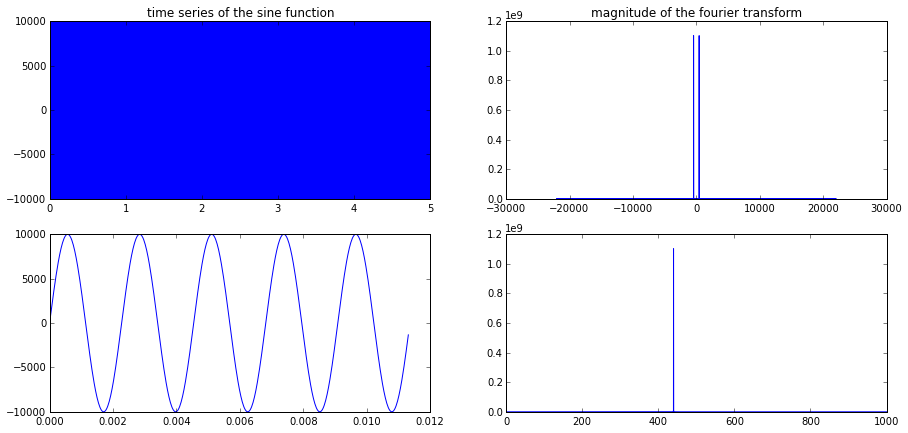

In [3]:
sample_rate = 44100 # 44.1 khz
duration = 5 # in sec

# Creates a uniformly spaced sequence from 0 to duration with 44100 per second
time = np.linspace(0,duration, num=sample_rate*duration)

# Amplitude and frequence: the amplitude corresponds to how loud and freq corresponds to pitch
A , f = 10000, 440
sinewav = A*np.sin(2*np.pi*f*time)

# The fourier transform (the values are complex)
# the FT of a sine function is a delta function
sinewav_fft = np.fft.fft(sinewav)
# the associated frequencies with the transform 
freq = np.fft.fftfreq(len(sinewav_fft))*sample_rate

plt.subplots(2,2,figsize=(15,7))
plt.subplot(2,2,1)
plt.title("time series of the sine function")
plt.plot(time,sinewav)
plt.subplot(2,2,2)
plt.title("magnitude of the fourier transform")
plt.plot(freq,np.abs(sinewav_fft))
plt.subplot(2,2,3)
#only showing ~12ms so that you can see the sine wave structure. 
plt.plot(time[0:500],sinewav[0:500])
plt.subplot(2,2,4)
#zoomed in, so that you can see the peak is at 440Hz
plt.plot(freq[0:5000],np.abs(sinewav_fft)[0:5000])

plt.show()

wavfile.write('440.wav', sample_rate, sinewav.astype(np.int16))
IPython.display.Audio('440.wav')

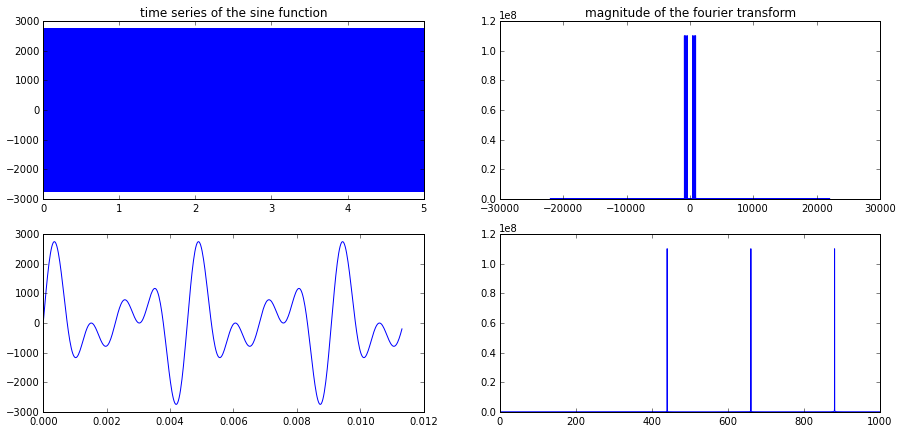

In [4]:
sample_rate = 44100 #44.1 khz
duration =5 # in sec

#creates a uniformly spaced sequence from 0 to duration with 44100 per second
time = np.linspace(0,duration, num=sample_rate*duration)

#Amplitude and frequence: the amplitude corresponds to how loud and freq corresponds to pitch
A1, f1 = 1000, 440
A2, f2 = 1000, 660
A3, f3 = 1000, 880

#wave is the sum of three sinusoidal functions with different frequencies
wave = A1*np.sin(2*np.pi*f1*time)+A2*np.sin(2*np.pi*f2*time)+A3*np.sin(2*np.pi*f3*time)

# the fourier transform (the values are complex)
# the FT of a sine function is a delta function
wave_fft = np.fft.fft(wave)
# the associated frequencies with the transform 
freq = np.fft.fftfreq(len(wave_fft))*sample_rate

plt.subplots(2,2,figsize=(15,7))
plt.subplot(2,2,1)
plt.title("time series of the sine function")
plt.plot(time,wave)
plt.subplot(2,2,2)
plt.title("magnitude of the fourier transform")
plt.plot(freq,np.abs(wave_fft))
plt.subplot(2,2,3)
#only showing ~12ms so that you can see the sine wave structure. 
plt.plot(time[0:500],wave[0:500])
plt.subplot(2,2,4)
#zoomed in, so that you can see the peak is at 440Hz
plt.plot(freq[0:5000],np.abs(wave_fft)[0:5000])

plt.show()

wavfile.write('wave.wav', sample_rate, wave.astype(np.int16))
IPython.display.Audio('wave.wav')

# Mathematical Defintions
Fourier Transform
$$F(k) = \int_{-\infty}^\infty f(x) e^{ik x} dx $$
Inverse Fourier Transform
$$f(x) = \frac{1}{2 \pi}\int_{-\infty}^\infty F(k) e^{-ik x} dk $$

The complex exponential can be broken into it's real and imaginary components
$$ r e^{i\theta} = r cos\theta +i r sin\theta $$
$$ Re({r e^{i\theta}}) = r cos\theta $$
$$ Im({r e^{i\theta}}) =  r sin\theta $$

or it can be talked about in terms of it's magnitude, $r$, and phase, $\theta$.

This means that when we take the real and imaginary components of the fourier transform of a real function we find:
$$ Re({F(k)}) = {\int_{-\infty}^\infty f(x) cos({k x}) dx} $$
$$ Im({F(k)}) = {\int_{-\infty}^\infty f(x) sin({k x}) dx} $$

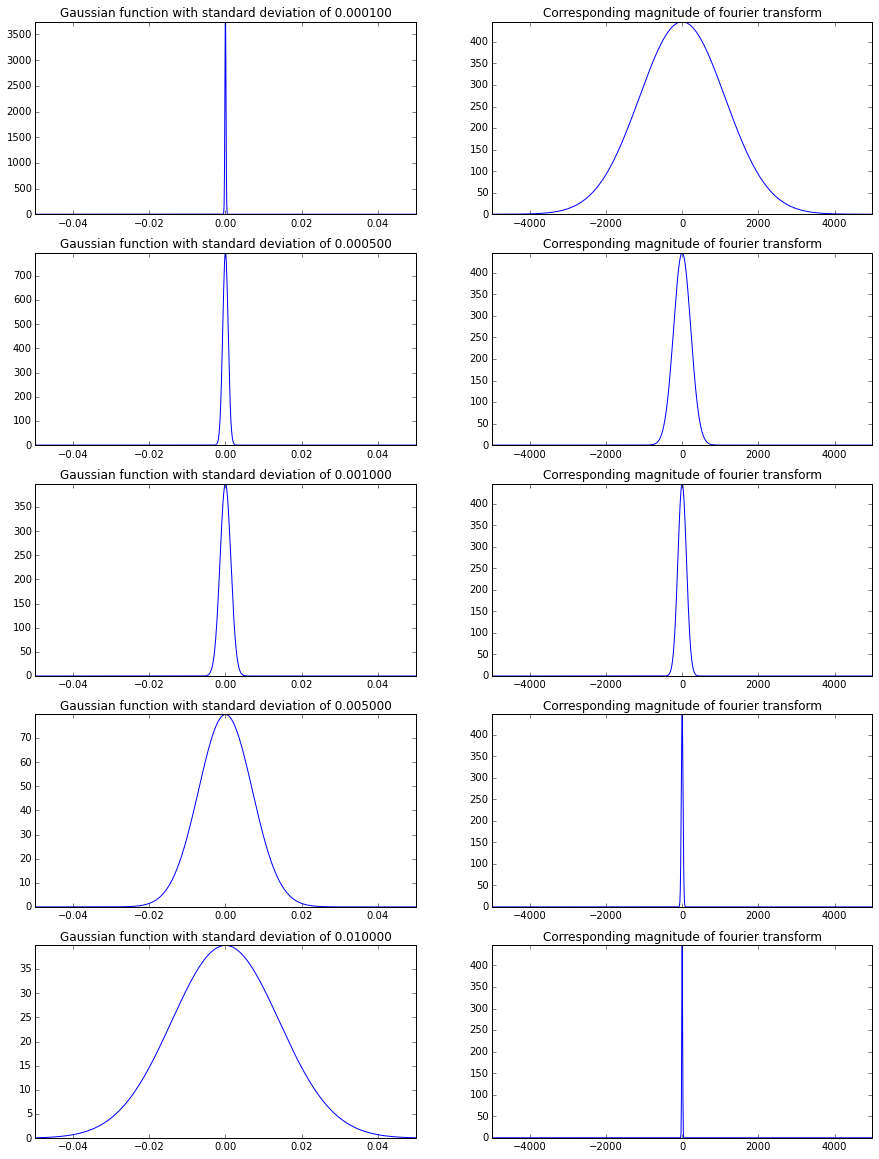

In [5]:
sample_rate = 10000
length =0.1

x = np.linspace(-length/2.0,length/2.0, num=sample_rate*length)


# This shows that as the orignal function has a larger spread, the spread of the corresponding FT will shrink

plt.subplots(5,2,figsize=(15,20))
sigmas = [0.0001,0.0005,0.001,0.005,0.01]
for i,sigma in enumerate(sigmas):
    wave = gaussian(sigma,0,x)
    n = len(wave)
    wave_fft = np.fft.fftshift(np.fft.fft(np.fft.fftshift(wave), norm = 'ortho'))
    freq = np.fft.fftshift(np.fft.fftfreq(n))*sample_rate

    plt.subplot(5,2,2*i+1)
    plt.plot(x,wave)
    axes = plt.gca()
    plt.title("Gaussian function with standard deviation of %f" %(sigma))
    axes.set_xlim([min(x),max(x)])
    axes.set_ylim([min(wave),max(wave)])

    plt.subplot(5,2,2*i+2)
    plt.plot(freq, np.abs(wave_fft))
    axes = plt.gca()
    plt.title("Corresponding magnitude of fourier transform")
    axes.set_xlim([min(freq),max(freq)])
    axes.set_ylim([min(np.abs(wave_fft)),max(np.abs(wave_fft))])

plt.show()

# Fourier Series

Unlike the Fourier transform where we integrate over all $\Re$, for the Fourier series we only sample from a period of length $T$.  The result is that the reconstruction is periodic with period $T$.

$$ a_n = \frac{1}{T}\int_{-T/2}^{T/2}f(t)cos(\frac{2\pi n t}{T}) dt $$


$$ b_n = \frac{1}{T}\int_{-T/2}^{T/2}f(t)sin(\frac{2\pi n t}{T}) dt $$


$$ f(t) = a_0 + 2\{\sum_{n=1}^\infty a_n cos(\frac{2 \pi n t}{T}) + b_n sin(\frac{2 \pi n t}{T})\} $$

Note: Since $cos\theta$ is an even function and $sin\theta$ is an odd function, if the function is symmetric across the y-axis (i.e. an even function) then all the $b_n$ will be zero.

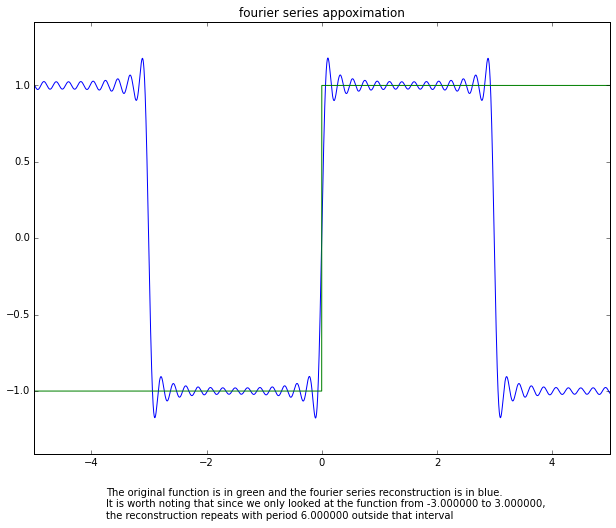

In [6]:
# The cosine coefficients of the fourier series
a = []
# The sine coefficients of the fourier series
b = []
# The period of the function
T = 6
# Definition of function we're trying to characterize (try changing this to see other results)
f = np.sign
#f = np.exp
#f = np.square

n_comp = 30

# Calculate the a_n terms:
for n in range(n_comp):
    a.append(integrate(lambda x: f(x)*np.cos(2*np.pi*n*x/float(T))/float(T),-float(T)/2,float(T)/2))

for n in range(n_comp):
    b.append(integrate(lambda x: f(x)*np.sin(2*np.pi*n*x/float(T))/float(T),-float(T)/2,float(T)/2))

L=10
x = np.linspace(-float(L)/2,float(L)/2, num=1000*L)
reconstruction = np.array([a[0] for i in range(len(x))])

# This is the sum of the even components
for i in range(1,len(a)-1):
    reconstruction += 2*a[i]*np.cos(2*np.pi*i*x/float(T))
# This is the sum of the odd components
for i in range(1,len(b)-1):
    reconstruction += 2*b[i]*np.sin(2*np.pi*i*x/float(T))


plt.subplots(1,1,figsize=(10,10))
plt.plot(x,reconstruction)
plt.plot(x,f(x))
#  Formating
axes = plt.gca()
h=max(reconstruction)-min(reconstruction)
axes.set_xlim([-float(L)/2,float(L)/2])
axes.set_ylim([min(reconstruction)-0.1*h,max(reconstruction)+0.1*h])
axes.set_position((0.1, 0.3, 0.8, 0.6))
plt.title("fourier series appoximation")
plt.figtext(0.2, 0.21, "The original function is in green and the fourier series reconstruction is in blue.  \nIt is worth noting that since we only looked at the function from %f to %f, \nthe reconstruction repeats with period %f outside that interval"%(-float(T)/2,float(T)/2,float(T)))
plt.show()

# Relation to Fourier Transform

we can combine $a_n$ and $b_n$ into a single complex value by:
$$ c_n = a_n + i b_n$$

$$ \implies c_n = \frac{1}{T}\int_{-T/2}^{T/2}f(t)cos(\frac{2\pi n t}{T}) dt + i \frac{1}{T}\int_{-T/2}^{T/2}f(t)sin(\frac{2\pi n t}{T}) dt $$

$$ \implies c_n = \frac{1}{T}\int_{-T/2}^{T/2}f(t) \{ cos(\frac{2\pi n t}{T})+i sin(\frac{2\pi n t}{T}) \} dt $$

$$ \implies c_n = \frac{1}{T}\int_{-T/2}^{T/2}f(t) e^{(i \frac{2\pi n t}{T})} dt $$

if we set $\omega= \frac{2 \pi n}{T}$ and $x=\frac{t}{T}$ then $dx =\frac{dt}{T}$ and as $T\rightarrow\infty$ the space of possible $\omega$ gets denser.  
$$ \implies F(\omega) = \lim_{T \rightarrow \infty} c_n = \lim_{T \rightarrow \infty} \int_{-T/2}^{T/2}f(t) e^{(i \omega t)} dt = \int_{-\infty}^{\infty} f(t) e^{i \omega t}  $$ 

Notice this is the same definition as before.  Basically fourier series coefficients are just the the fourier transform values at frequencies that are multiples of one over the period of the form $\omega = \frac{2 \pi n}{T}$ where $n \in \mathbb{Z}$

# Higher Dimensional Fourier Transforms

We can extend the notion of fourier transform to higher dimensional spaces by taking the dot product of $\vec{k}$ and $\vec{x}$

$$F(\vec{k}) = \int_{\Re^n} f(\vec{x}) e^{i \vec{k} \cdot \vec{x}}$$

$$f(\vec{x}) = \frac{1}{{(2\pi)}^n}\int_{\Re^n} F(\vec{k}) e^{-i \vec{k} \cdot \vec{x}}$$

This means that if we are in two dimensions then the fourier transform will be complex valued in two dimensions.  What complex valued means is that we will have both real and imaginary components or equivalently magnitude and phase values for every point in $k$-space

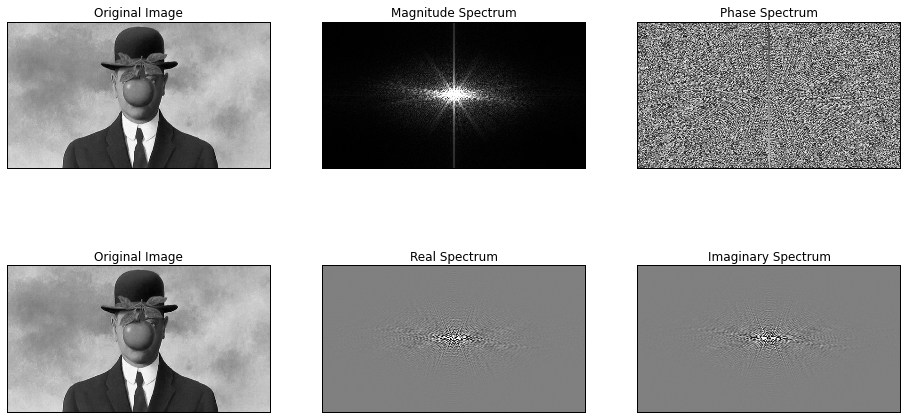

In [7]:
# The picture must by located in the same directory as the notebook
image_file = "picture.jpg"
im = PIL.Image.open(image_file)
im = im.convert('L')
im_array = np.asarray(im.rotate(0))
mx = 100

# Since the values are index by an array, the np.fft assumes they are ordered such that
# fft[0] is the 0 component then asccending regularly to fft[n/2] is the max value, 
# followed by fft[n/2+1] as the min and descending until fft[n] in k-space
# this is why we use np.fft.fftshift and np.fft.fftishift

im_fft = np.fft.fft2(np.fft.ifftshift(im_array),norm = 'ortho')
fshift = np.fft.fftshift(im_fft)

magnitude_spectrum = np.abs(fshift)
phase_spectrum = np.angle(fshift)
real_spectrum = np.real(fshift)
imag_spectrum = np.imag(fshift)

f, axs = plt.subplots(2,3,figsize=(16,8))
plt.subplot(231),plt.imshow(im_array, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(cut_max(magnitude_spectrum,mx), cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(cut_max(phase_spectrum,mx), cmap = 'gray')
plt.title('Phase Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(234),plt.imshow(im_array, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.imshow(cut_max(real_spectrum,mx), cmap = 'gray')
plt.title('Real Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(236),plt.imshow(cut_max(imag_spectrum,mx), cmap = 'gray')
plt.title('Imaginary Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

# Note that the center of the images corresponds to point (0,0) in both spaces
# and the fourier series is completely characterized by either the magnitude and phase spectrum (the one mostly used)
# or the real and imaginary spectrum

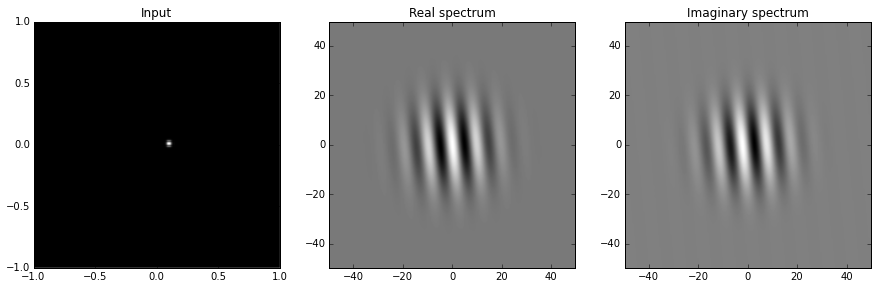

In [8]:
sample_rate = 100
size = (2,2)
num_samples_x = sample_rate*size[0]+1
num_samples_y = sample_rate*size[1]+1
x = np.linspace(-size[0]/2.,size[0]/2., num = num_samples_x)
y = np.linspace(-size[1]/2.,size[1]/2., num = num_samples_y)

# This is where the gaussian is centered, if sigma is very small it's like an isolated peak centered at (mux,muy)
mux=0.1
muy=0.01
sigma=0.01

im_gauss_array = np.zeros((num_samples_y,num_samples_x))
for i in range(num_samples_x):
    for j in range(num_samples_y):
        im_gauss_array[j][i] = 100*gaussian(sigma,mux,x[i])*gaussian(sigma,muy,-y[j])

#plt.imshow(im_gauss_array, cmap = 'gray',interpolation='none', extent=[-size[0]/2.,size[0]/2.0,-size[1]/2.,size[1]/2.0])
im_gauss_fft = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(im_gauss_array),norm = 'ortho'))
plt.subplots(1,3,figsize=(15,15))
plt.subplot(1,3,1),plt.imshow(im_gauss_array, cmap = 'gray',interpolation ='none',extent=[-size[0]/2.,size[0]/2.0,-size[1]/2.,size[1]/2.0])
plt.title("Input")
limits = [min(np.fft.fftfreq(len(x)))*sample_rate, max(np.fft.fftfreq(len(x)))*sample_rate,min(np.fft.fftfreq(len(y)))*sample_rate, max(np.fft.fftfreq(len(y)))*sample_rate]
plt.subplot(1,3,2),plt.imshow(np.real(im_gauss_fft), cmap = 'gray',extent=limits)
plt.title("Real spectrum")
plt.subplot(1,3,3),plt.imshow(np.imag(im_gauss_fft), cmap = 'gray',extent=limits)
plt.title("Imaginary spectrum")
plt.show()

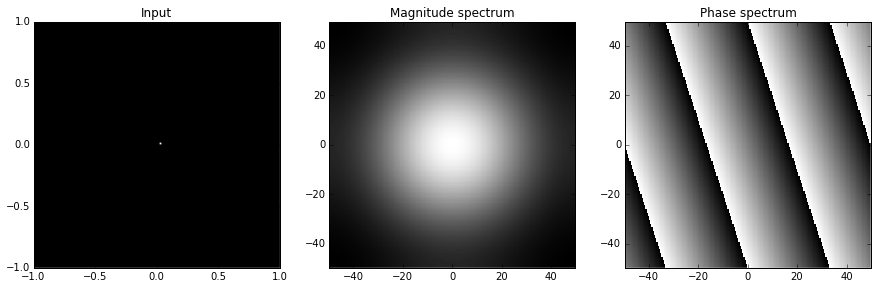

In [9]:
sample_rate = 100
size = (2,2)
num_samples_x = sample_rate*size[0]+1
num_samples_y = sample_rate*size[1]+1
x = np.linspace(-size[0]/2.,size[0]/2., num = num_samples_x)
y = np.linspace(-size[1]/2.,size[1]/2., num = num_samples_y)

# This is where the gaussian is centered, if sigma is very small it's like an isolated peak centered at (mux,muy)
mux=0.03
muy=+0.01
sigma=0.005

im_gauss_array = np.zeros((num_samples_y,num_samples_x))
for i in range(num_samples_x):
    for j in range(num_samples_y):
        im_gauss_array[j][i] = 100*gaussian(sigma,mux,x[i])*gaussian(sigma,muy,-y[j])
        
im_gauss_fft = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(im_gauss_array),norm = 'ortho'))
plt.subplots(1,3,figsize=(15,15))
plt.subplot(1,3,1),plt.imshow(im_gauss_array, cmap = 'gray',interpolation ='none',extent=[-size[0]/2.,size[0]/2.0,-size[1]/2.,size[1]/2.0])
plt.title("Input")
limits = [min(np.fft.fftfreq(len(x)))*sample_rate, max(np.fft.fftfreq(len(x)))*sample_rate,min(np.fft.fftfreq(len(y)))*sample_rate, max(np.fft.fftfreq(len(y)))*sample_rate]
plt.subplot(1,3,2),plt.imshow(np.abs(im_gauss_fft), cmap = 'gray',extent=limits,interpolation ='none')
plt.title("Magnitude spectrum")
plt.subplot(1,3,3),plt.imshow(np.angle(im_gauss_fft), cmap = 'gray',extent=limits,interpolation ='none')
plt.title("Phase spectrum")
plt.show()

/Users/jarnemann/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:37: ComplexWarning: Casting complex values to real discards the imaginary part


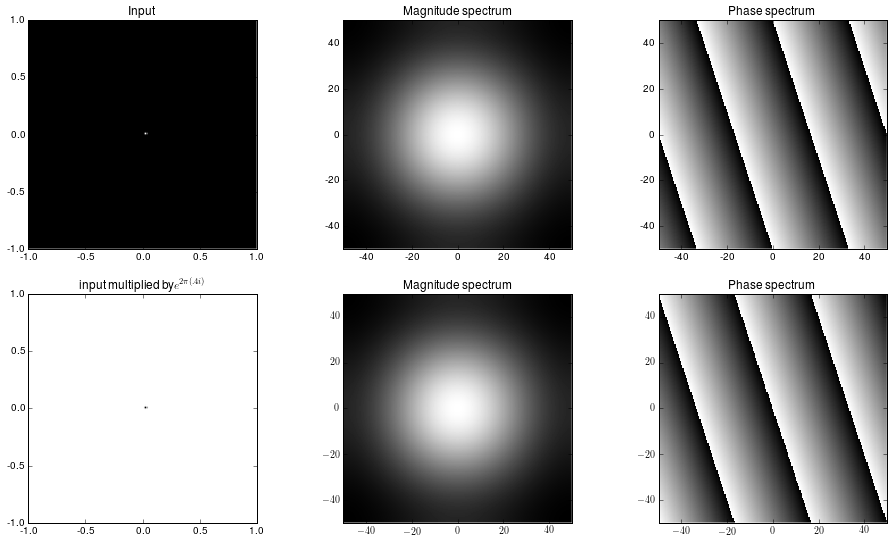

In [10]:
sample_rate = 100
size = (2,2)
num_samples_x = sample_rate*size[0]+1
num_samples_y = sample_rate*size[1]+1
x = np.linspace(-size[0]/2.,size[0]/2., num = num_samples_x)
y = np.linspace(-size[1]/2.,size[1]/2., num = num_samples_y)

# This is where the gaussian is centered, if sigma is very small it's like an isolated peak centered at (mux,muy)
mux=0.03
muy=0.01
sigma=0.005


# These plots compare the FT of an input with the FT of the input multiplied by some value

plt.subplots(2,3,figsize=(16,9))

im_gauss_array = np.zeros((num_samples_y,num_samples_x))
for i in range(num_samples_x):
    for j in range(num_samples_y):
        im_gauss_array[j][i] = 100*gaussian(sigma,mux,x[i])*gaussian(sigma,muy,-y[j])

        
im_gauss_fft = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(im_gauss_array),norm = 'ortho'))

plt.subplot(2,3,1),plt.imshow(im_gauss_array, cmap = 'gray',interpolation ='none',extent=[-size[0]/2.,size[0]/2.0,-size[1]/2.,size[1]/2.0])
plt.title("Input")
limits = [min(np.fft.fftfreq(len(x)))*sample_rate, max(np.fft.fftfreq(len(x)))*sample_rate,min(np.fft.fftfreq(len(y)))*sample_rate, max(np.fft.fftfreq(len(y)))*sample_rate]
plt.subplot(2,3,2),plt.imshow(np.abs(im_gauss_fft), cmap = 'gray',extent=limits,interpolation ='none')
plt.title("Magnitude spectrum")
plt.subplot(2,3,3),plt.imshow(np.angle(im_gauss_fft), cmap = 'gray',extent=limits,interpolation ='none')
plt.title("Phase spectrum")

im_gauss_array = np.zeros((num_samples_y,num_samples_x))
for i in range(num_samples_x):
    for j in range(num_samples_y):
        im_gauss_array[j][i] = 100*gaussian(sigma,mux,x[i])*gaussian(sigma,muy,-y[j])*np.exp(2*np.pi*.4j)

        
im_gauss_fft = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(im_gauss_array),norm = 'ortho'))
plt.subplot(2,3,4),plt.imshow(im_gauss_array, cmap = 'gray',interpolation ='none',extent=[-size[0]/2.,size[0]/2.0,-size[1]/2.,size[1]/2.0])
plt.rc('text', usetex=True)
plt.title(r"input multiplied by$\displaystyle e^{2\pi{(.4 i)}}$")
limits = [min(np.fft.fftfreq(len(x)))*sample_rate, max(np.fft.fftfreq(len(x)))*sample_rate,min(np.fft.fftfreq(len(y)))*sample_rate, max(np.fft.fftfreq(len(y)))*sample_rate]
plt.subplot(2,3,5),plt.imshow(np.abs(im_gauss_fft), cmap = 'gray',extent=limits,interpolation ='none')
plt.title("Magnitude spectrum")
plt.subplot(2,3,6),plt.imshow(np.angle(im_gauss_fft), cmap = 'gray',extent=limits,interpolation ='none')
plt.title("Phase spectrum")
plt.show()

/Users/jarnemann/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:37: ComplexWarning: Casting complex values to real discards the imaginary part


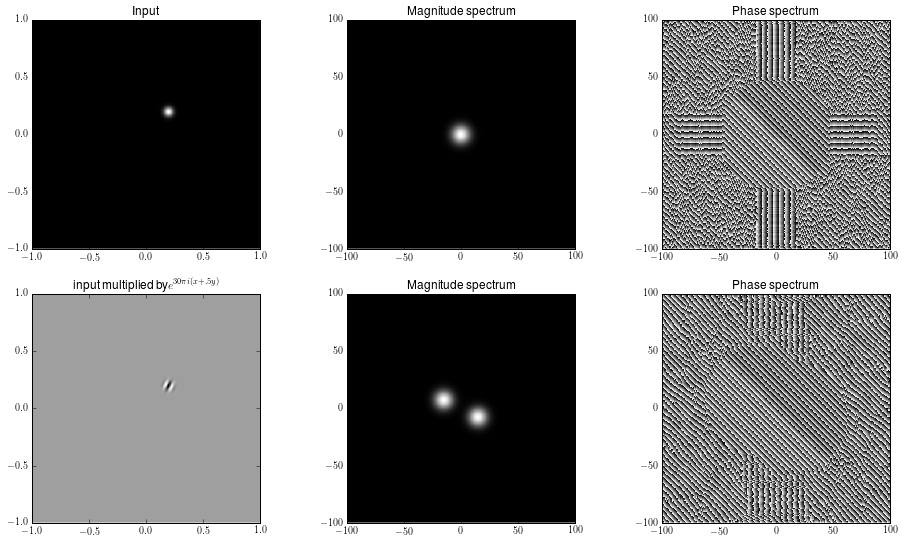

In [11]:
sample_rate = 200
size = (2,2)
num_samples_x = sample_rate*size[0]+1
num_samples_y = sample_rate*size[1]+1
x = np.linspace(-size[0]/2.,size[0]/2., num = num_samples_x)
y = np.linspace(-size[1]/2.,size[1]/2., num = num_samples_y)

# This is where the gaussian is centered, if sigma is very small it's like an isolated peak centered at (mux,muy)
mux=0.2
muy=0.2
sigma =.02


# These plots compare the FT of an input with the FT of the input multiplied by some value

plt.subplots(2,3,figsize=(16,9))

im_gauss_array = np.zeros((num_samples_y,num_samples_x))
for i in range(num_samples_x):
    for j in range(num_samples_y):
        im_gauss_array[j][i] = 100*gaussian(sigma,mux,x[i])*gaussian(sigma,muy,-y[j])

        
im_gauss_fft = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(im_gauss_array),norm = 'ortho'))

plt.subplot(2,3,1),plt.imshow(im_gauss_array, cmap = 'gray',interpolation ='none',extent=[-size[0]/2.,size[0]/2.0,-size[1]/2.,size[1]/2.0])
plt.title("Input")
limits = [min(np.fft.fftfreq(len(x)))*sample_rate, max(np.fft.fftfreq(len(x)))*sample_rate,min(np.fft.fftfreq(len(y)))*sample_rate, max(np.fft.fftfreq(len(y)))*sample_rate]
plt.subplot(2,3,2),plt.imshow(np.abs(im_gauss_fft), cmap = 'gray',extent=limits,interpolation ='none')
plt.title("Magnitude spectrum")
plt.subplot(2,3,3),plt.imshow(np.angle(im_gauss_fft), cmap = 'gray',extent=limits,interpolation ='none')
plt.title("Phase spectrum")

im_gauss_array = np.zeros((num_samples_y,num_samples_x))
for i in range(num_samples_x):
    for j in range(num_samples_y):
        im_gauss_array[j][i] = 100*gaussian(sigma,mux,x[i])*gaussian(sigma,muy,-y[j])*np.exp(np.pi*1j*30*(x[i]+.5*y[j]))

        
im_gauss_fft = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(im_gauss_array),norm = 'ortho'))
plt.subplot(2,3,4),plt.imshow(im_gauss_array, cmap = 'gray',interpolation ='none',extent=[-size[0]/2.,size[0]/2.0,-size[1]/2.,size[1]/2.0])
plt.rc('text', usetex=True)
plt.title(r"input multiplied by$\displaystyle e^{30\pi{i (x+.5y)}}$")
limits = [min(np.fft.fftfreq(len(x)))*sample_rate, max(np.fft.fftfreq(len(x)))*sample_rate,min(np.fft.fftfreq(len(y)))*sample_rate, max(np.fft.fftfreq(len(y)))*sample_rate]
plt.subplot(2,3,5),plt.imshow(np.abs(im_gauss_fft), cmap = 'gray',extent=limits,interpolation ='none')
plt.title("Magnitude spectrum")
plt.subplot(2,3,6),plt.imshow(np.angle(im_gauss_fft), cmap = 'gray',extent=limits,interpolation ='none')
plt.title("Phase spectrum")
plt.show()